# **Credit Card Fraud Detection **

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

**Loading and Initial Exploration of the Dataset**

In [2]:
# Load the dataset
data = pd.read_csv('/content/creditcard_2023.csv')

In [3]:
# Display basic info and first few rows
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55112 entries, 0 to 55111
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      55112 non-null  int64  
 1   V1      55112 non-null  float64
 2   V2      55112 non-null  float64
 3   V3      55112 non-null  float64
 4   V4      55112 non-null  float64
 5   V5      55112 non-null  float64
 6   V6      55112 non-null  float64
 7   V7      55112 non-null  float64
 8   V8      55112 non-null  float64
 9   V9      55112 non-null  float64
 10  V10     55112 non-null  float64
 11  V11     55112 non-null  float64
 12  V12     55112 non-null  float64
 13  V13     55112 non-null  float64
 14  V14     55112 non-null  float64
 15  V15     55112 non-null  float64
 16  V16     55112 non-null  float64
 17  V17     55112 non-null  float64
 18  V18     55112 non-null  float64
 19  V19     55111 non-null  float64
 20  V20     55111 non-null  float64
 21  V21     55111 non-null  float64
 22

In [4]:
# Check for missing values
print(data.isnull().sum())

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


In [5]:
data = data.dropna()

**Exploratory Data Analysis (EDA)**

Target Variable Distribution

In [6]:
# Check the distribution of the target variable
print(data['Class'].value_counts())

Class
0.0    54956
1.0      155
Name: count, dtype: int64


<ipython-input-7-cde1fa6bb1fc>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=data, palette='Set1')


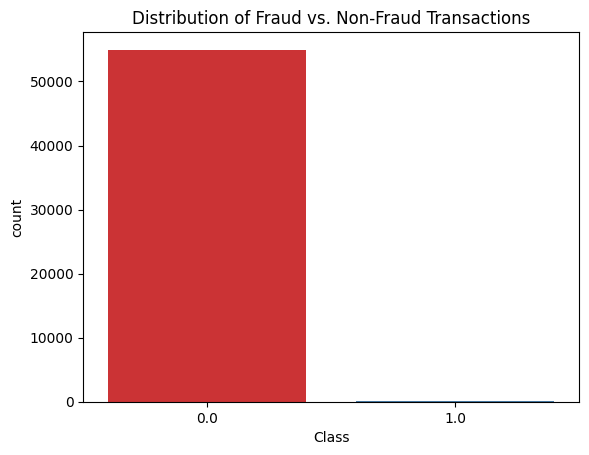

In [7]:
sns.countplot(x='Class', data=data, palette='Set1')
plt.title('Distribution of Fraud vs. Non-Fraud Transactions')
plt.show()

To handle this imbalance, techniques like oversampling (e.g., SMOTE) or undersampling, cost-sensitive learning, or anomaly detection methods can be used to improve the model's performance on the minority (fraudulent) class.

In [8]:
# Display percentage of fraud vs non-fraud
fraud_percentage = data['Class'].value_counts(normalize=True) * 100
print("Percentage of non-fraud transactions: ", fraud_percentage[0])
print("Percentage of fraud transactions: ", fraud_percentage[1])

Percentage of non-fraud transactions:  99.71874943296257
Percentage of fraud transactions:  0.2812505670374335


**Transaction Amount Analysis**

<ipython-input-9-e132ba1582f8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Amount', data=data, palette='Set2')


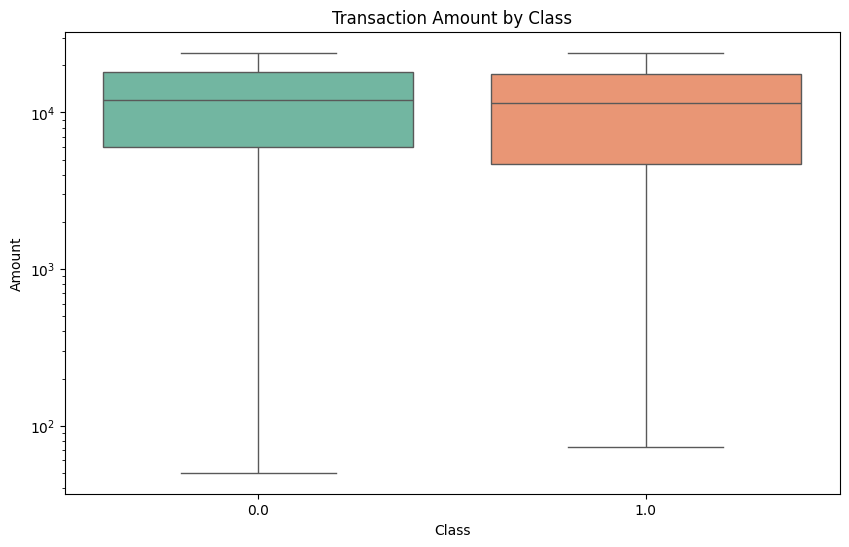

In [9]:
# Box plot of Amount for Fraud and Non-Fraud transactions
plt.figure(figsize=(10,6))
sns.boxplot(x='Class', y='Amount', data=data, palette='Set2')
plt.yscale('log')  # Using log scale due to outliers
plt.title('Transaction Amount by Class')
plt.show()

This box plot shows the distribution of transaction amounts for non-fraudulent (0) and fraudulent (1) transactions. Both classes have similar median transaction amounts, but the spread for fraudulent transactions is slightly broader, indicating higher variability. Both classes show a wide range of amounts, with most values falling between 10
2
  and 10
4

  on a log scale.

**Correlation Analysis**

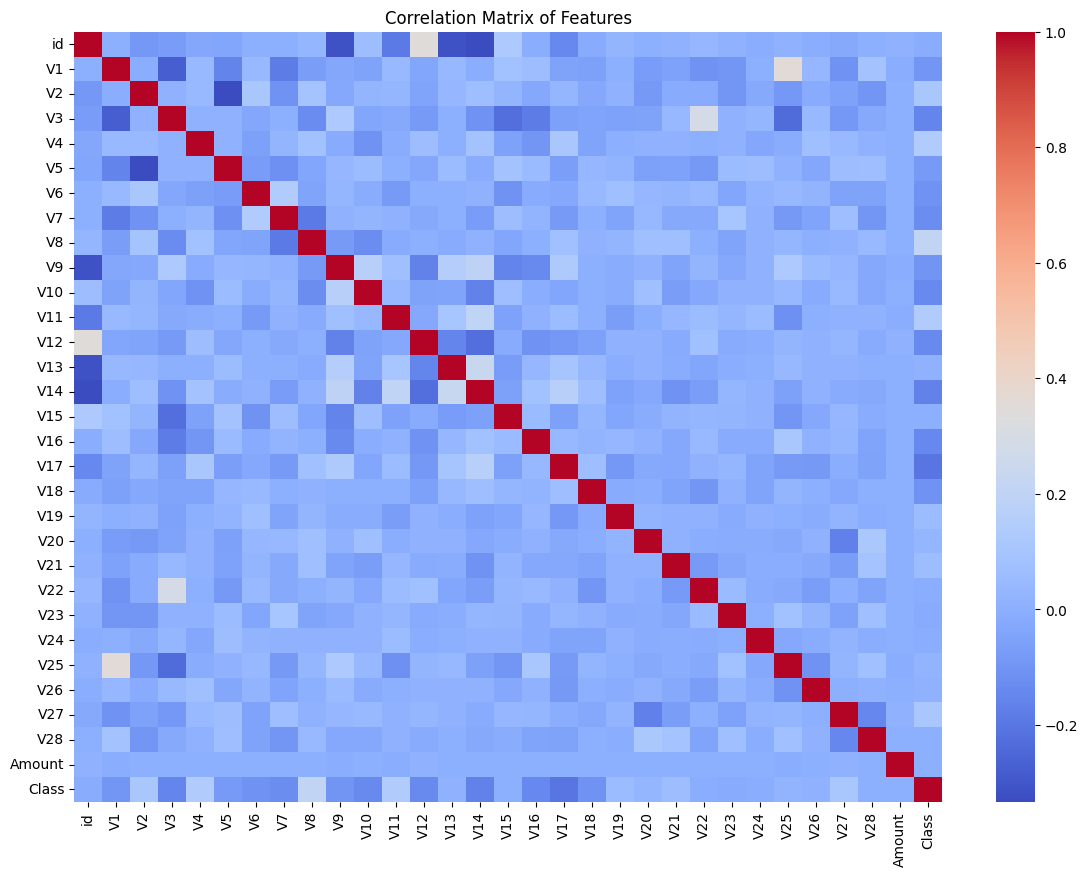

In [10]:
# Correlation heatmap of features
plt.figure(figsize=(14,10))
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix of Features')
plt.show()

In [11]:
# Focus on the correlations with 'Class' target variable
corr_with_target = corr['Class'].sort_values(ascending=False)
print("Top correlations with 'Class':\n", corr_with_target.head(10))

Top correlations with 'Class':
 Class    1.000000
V8       0.206473
V11      0.139333
V4       0.137299
V2       0.106600
V27      0.106579
V21      0.062737
V19      0.052610
V20      0.028052
V25      0.017115
Name: Class, dtype: float64


**Data Preprocessing**

In [12]:
scaler = StandardScaler()
data['scaled_Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))
data = data.drop(['Amount', 'id'], axis=1)

In [13]:
# Separate features and target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Check the new class distribution after resampling
print("Class distribution after SMOTE:", y_resampled.value_counts())

Class distribution after SMOTE: Class
0.0    43964
1.0    43964
Name: count, dtype: int64


After applying SMOTE (Synthetic Minority Over-sampling Technique), the class distribution is now balanced:

Non-Fraudulent Transactions (0): 43,964
Fraudulent Transactions (1): 43,964

This means SMOTE has generated synthetic examples for the minority class (fraudulent transactions) to match the number of non-fraudulent transactions. With equal representation of both classes, the model will now be better trained to recognize patterns in fraudulent transactions, potentially improving its performance in fraud detection.

In [15]:
print("Shape of training data after SMOTE:", X_resampled.shape)
print("Shape of test data:", X_test.shape)

Shape of training data after SMOTE: (87928, 29)
Shape of test data: (11023, 29)


**Train K-Nearest Neighbors Model**

In [18]:
# Initialize and fit the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_resampled, y_resampled) # Change X_train_resampled to X_resampled

KNeighborsClassifier()

**Model Evaluation on the Test Set**

In [19]:
# Predict on test set
y_pred = knn.predict(X_test)
y_pred_proba = knn.predict_proba(X_test)[:, 1]


In [20]:
# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[10970    22]
 [    1    30]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     10992
         1.0       0.58      0.97      0.72        31

    accuracy                           1.00     11023
   macro avg       0.79      0.98      0.86     11023
weighted avg       1.00      1.00      1.00     11023



Confusion Matrix

True Negatives (10970): The model correctly identified 10,970 non-fraudulent transactions.

False Positives (22): The model incorrectly flagged 22 non-fraudulent transactions as fraudulent.

False Negatives (1): The model missed 1 fraudulent transaction, labeling it as non-fraudulent.

True Positives (30): The model correctly identified 30 fraudulent transactions.

In [21]:
# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("\nROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.9830536577921772


The ROC-AUC score of 0.98 indicates that the model has a very high ability to distinguish between fraudulent and non-fraudulent transactions.

In simple terms, a score close to 1 (like 0.98) means the model is excellent at ranking transactions so that fraudulent ones are separated from non-fraudulent ones. This is a strong performance, especially for an imbalanced dataset, suggesting the model is effective at identifying fraud.






